In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.optimize import minimize

#sns.set()

# Step 1: Setting Up the Environment

In [6]:
# Set the random seed for reproducibility
np.random.seed(42)

# Generate 100 data points
num_points = 100

# Generate random prices between 10 and 100
prices = np.random.uniform(10, 100, num_points)

# Assume a log-linear relationship with some noise
# Quantity = exp(alpha + beta * log(price)) + noise
alpha = 500
beta = -1.5
noise = np.random.normal(0, 0.5, num_points)

quantities = alpha + beta * prices + noise

# Create a DataFrame
data = pd.DataFrame({'Price': prices, 'Quantity': quantities})
# Save to CSV
data.to_csv('fake_price_quantity_data.csv', index=False)


# Step 2: carregando o arquivo

       Price    Quantity
0  43.708611  434.480607
1  95.564288  356.504065
2  75.879455  386.226698
3  63.879264  403.187320
4  24.041678  463.827648


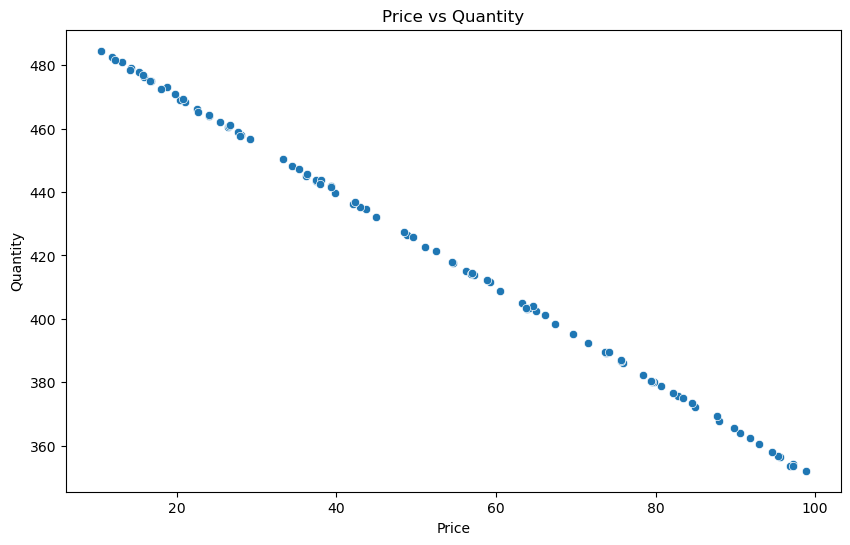

In [7]:
# Load the dataset
data = pd.read_csv('fake_price_quantity_data.csv')

# Display the first few rows of the dataset
print(data.head())

# Plot the data to visualize the relationship between price and quantity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Price', y='Quantity')
plt.title('Price vs Quantity')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.show()

# Step 3: Estimating Price Elasticity

Estimated Price Elasticity of Demand: -0.19747094652755037


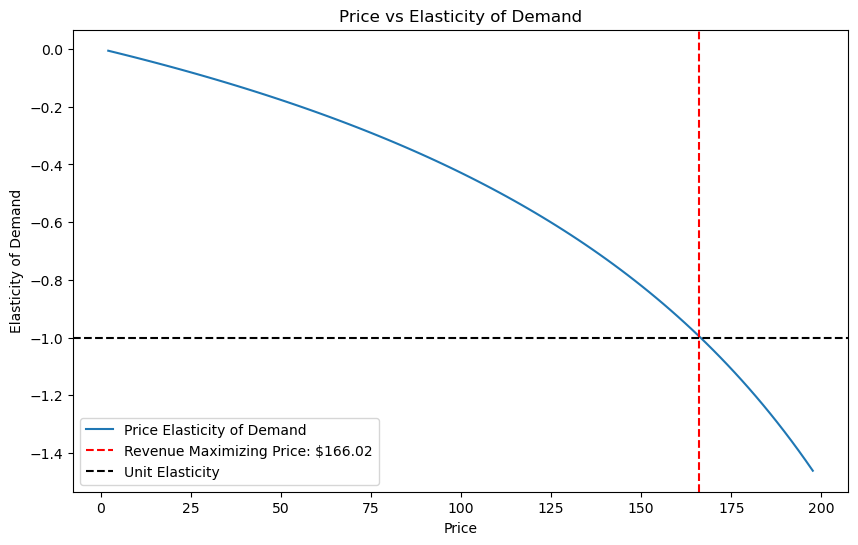

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Quantity   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.787e+05
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          6.25e-193
Time:                        15:30:21   Log-Likelihood:                -61.832
No. Observations:                 100   AIC:                             127.7
Df Residuals:                      98   BIC:                             132.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        500.1331      0.100   5003.055      0.000     499.935     500.331
Price         -1.5026      0.002   -882.429      0.000      -1.506      -1.499
==============================================================================
Omnibus:                        0.900   Durbin-Watson:                   2.285
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.808
Skew:                           0.217   Prob(JB):                        0.668
Kurtosis:                       2.929   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# Define the dependent and independent variables
X = data['Price']
y = data['Quantity']

# Add a constant to the independent variable (intercept term)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Display the summary of the regression model

x = np.linspace(2,2*data['Price'].max(),100)

elasticity = model.params['Price']*data['Price']/demand(data['Price'],model.params['const'],model.params['Price'])
print(f'Estimated Price Elasticity of Demand: {np.mean(elasticity)}')

elasticity = model.params['Price']*x/demand(x,model.params['const'],model.params['Price'])
plt.figure(figsize=(10, 6))
plt.plot(x,elasticity,label='Price Elasticity of Demand')
closest = x[elasticity.tolist().index(elasticity[int((np.abs(elasticity +1)).argmin())])]
plt.axvline(closest,color='red',linestyle='--',label='Revenue Maximizing Price: ${}'.format(round(closest,2)))
plt.axhline(-1,color='black',linestyle='--', label='Unit Elasticity')
plt.title('Price vs Elasticity of Demand')
plt.xlabel('Price')
plt.ylabel('Elasticity of Demand')
plt.legend()
plt.show()


model.summary()

# Step 4: Deriving the Revenue-Maximizing Price

In [19]:
# Define the demand function
def demand(price,alpha,beta):
    quantity = alpha + beta * price
    return quantity

#Define the revenue function
def revenue(price, alpha, beta):
    return price * demand(price, alpha, beta)

#Take the negative of the revenue function (minimizing the negative of a function is maximizing the original)
def negrevenue(price,alpha,beta):
    return -revenue(price,alpha,beta)
# Extract the intercept (alpha) and slope (beta) from the model
alpha = model.params['const']
beta = model.params['Price']
print(revenue(10,alpha,beta))
result = minimize(negrevenue,1000,
                  args=(alpha,beta,),
                  method='L-BFGS-B',
                  bounds=[(0.01,2*data['Price'].max())])
price_star = result.x[0]
result

4851.075480787735


  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: -41617.98170352808
        x: [ 1.664e+02]
      nit: 1
      jac: [ 0.000e+00]
     nfev: 6
     njev: 3
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>

In [21]:
result.x[0]

166.42767482018135

In [20]:
result.x

array([166.42767482])

In [1]:
# Step 5: Visualizing the Revenue Price Curve

Revenue-Maximizing Price: 167.3943705198961
Estimated Revenue-Maximizing Price: 166.42753211446205
Maximum Revenue: 41665.87233731966


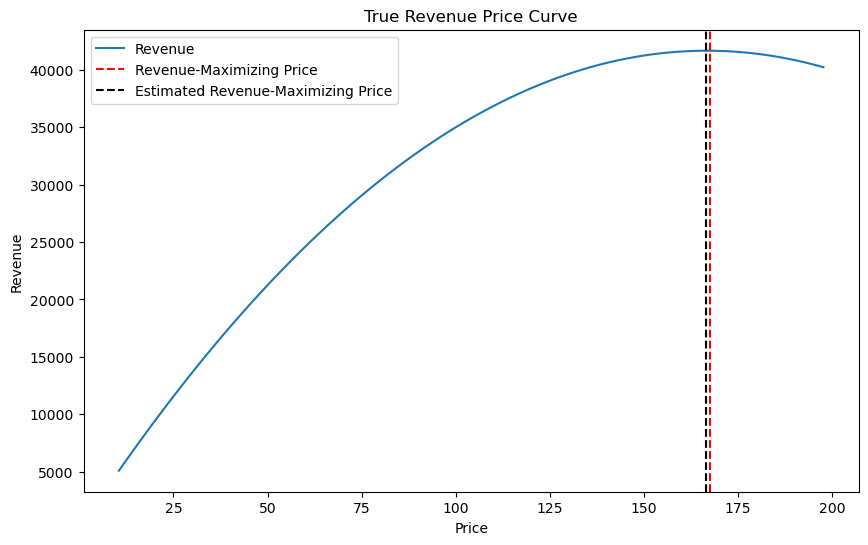

In [17]:
true_alpha = 500
true_beta = -1.5
price_range = np.linspace(data['Price'].min(), 2*data['Price'].max(), 100)

revenue_values = [revenue(p, true_alpha, true_beta) for p in price_range]

# Find the price that maximizes revenue
max_revenue_price = price_range[np.argmax(revenue_values)]
max_revenue = max(revenue_values)

print(f'Revenue-Maximizing Price: {max_revenue_price}')
print(f'Estimated Revenue-Maximizing Price: {price_star}')
print(f'Maximum Revenue: {max_revenue}')

# Plot the revenue price curve
plt.figure(figsize=(10, 6))
plt.plot(price_range, revenue_values, label='Revenue')
plt.axvline(max_revenue_price, color='red', linestyle='--', label='Revenue-Maximizing Price')
plt.axvline(price_star, color='Black', linestyle='--', label='Estimated Revenue-Maximizing Price')
plt.title('True Revenue Price Curve')
plt.xlabel('Price')
plt.ylabel('Revenue')
plt.legend()
plt.show()
